In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth_data = os.path.join('..', 'data', 'modeling', 'interpret')
pth_out = os.path.join('..', 'figures')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_data, 'training.h5ad'))
adata

AnnData object with n_obs × n_vars = 1575028 × 856
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'trajectory', 'training', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'plates', 'devtime', 'location', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'total_counts_ribo', 'pct_counts_ribo', 'T+ Sox2+', 'batch', 'percent_mito', 'n_counts', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype_original', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'RNA_snn_res.0.5', 'ident', 'velocity_self_transition', 'source', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score'

In [4]:
# feature importance (attribution ratio)
attr_z = abs(adata.layers['IG_z'].mean(0))
attr_v = abs(adata.layers['IG_v'].mean(0))
attr = np.asarray(attr_z / attr_v).squeeze()
df = (pd.Series(attr, index = adata.var_names)
      .sort_values(ascending = False))
df.head(10)

Rps26         0.214890
Rps20         0.117562
Mrpl34        0.050495
St6galnac4    0.025405
Lmo1          0.021009
Pcbd1         0.018266
Laptm4a       0.015616
Notch2        0.014453
Comp          0.011635
Lum           0.008983
dtype: float64

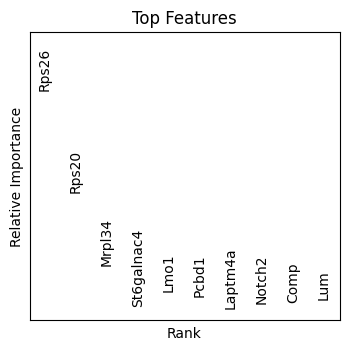

In [5]:
top_n = 10    # plot top features
fig, ax = plt.subplots(1, 1, figsize = (4, 3.75))
for i in range(top_n):
    x, y, s = (i + 1), df.iloc[i], df.index[i]
    ax.text(x, y, s, rotation = 90, ha = 'center', va = 'center')

ax.set_xlim([.5, top_n + .5])
ax.set_ylim([-.025, .25])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Rank')
ax.set_ylabel('Relative Importance')
ax.set_title('Top Features')
fn = os.path.join(pth_out, 'attributions.svg')
plt.savefig(fn, bbox_inches = 'tight')